In [ ]:
# google drive
from google.colab import drive

# Data libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

# modeling librarires
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector

#
import requests
import cv2

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
boston_path = '/content/drive/MyDrive/IK/data/Boston.csv'
tv_path = '/content/drive/MyDrive/IK/data/tvmarketing.csv'

In [ ]:
boston = pd.read_csv(boston_path)
tv = pd.read_csv(tv_path)

In [ ]:
# Define input and output
X, Y = tv.TV.values, tv.Sales.values

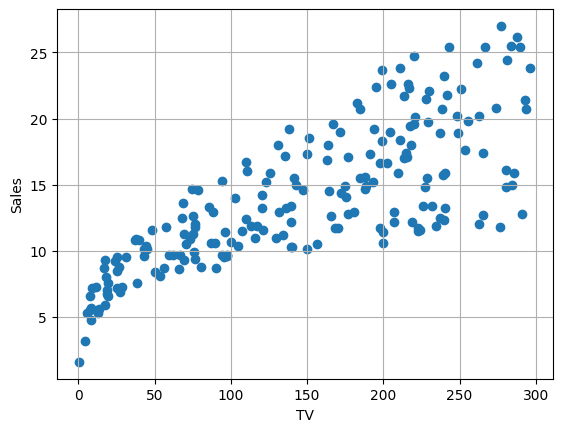

In [ ]:
# Visualize data
plt.scatter(X, Y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid()

In [ ]:
# Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    train_size = 0.7,
                                                    shuffle = True,
                                                    random_state = 42)

if X_train.ndim == 1:
  X_train, X_test = np.expand_dims(X_train, 1), np.expand_dims(X_test, 1)

if Y_train.ndim == 1:
  Y_train, Y_test = np.expand_dims(Y_train, 1), np.expand_dims(Y_test, 1)

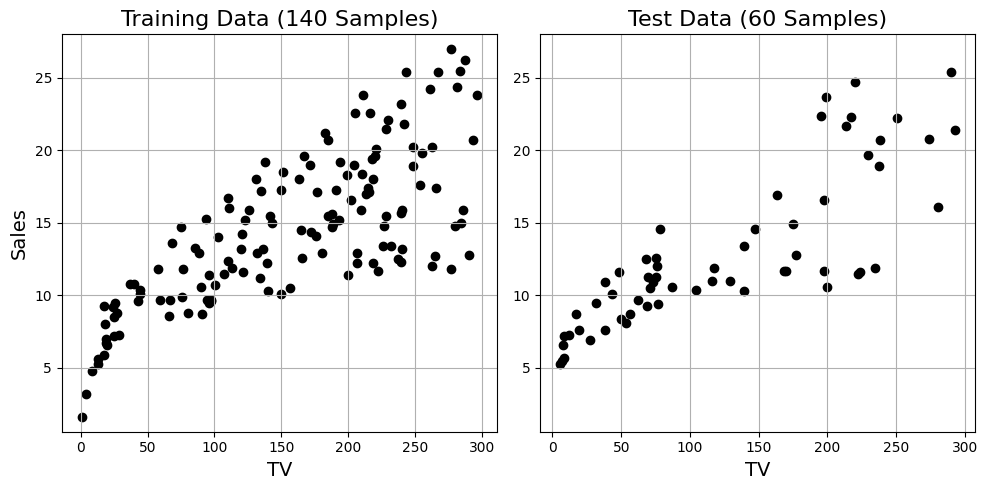

In [ ]:
# Visualize training and test data
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(X_train, Y_train, c = 'k')
ax[0].grid()
ax[0].set_title(f"Training Data ({X_train.shape[0]} Samples)", fontsize = 16)
ax[0].set_xlabel('TV', fontsize = 14)
ax[0].set_ylabel('Sales', fontsize = 14)
ax[0].set_ylim([Y.min()-1, Y.max()+1])

ax[1].scatter(X_test, Y_test, c = 'k')
ax[1].grid()
ax[1].set_title(f"Test Data ({X_test.shape[0]} Samples)", fontsize = 16)
ax[1].set_xlabel('TV', fontsize = 14)
ax[1].set_ylim([Y.min()-1, Y.max()+1])

fig.tight_layout()

In [ ]:
# fit linear regression using sklearn
model_1 = LinearRegression(fit_intercept = True)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

model_1.fit(X = X_train_s, y = Y_train) ;

In [ ]:
print(f"Bias: {model_1.intercept_.item()}")
print(f"Slope: {model_1.coef_.item()}")

Bias: 14.49714285714286
Slope: 3.879676345699859


In [ ]:
# Predict on training and test set
Y_train_pred = model_1.predict(X_train_s)
Y_test_pred = model_1.predict(X_test_s)

# Evaluate model performance
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

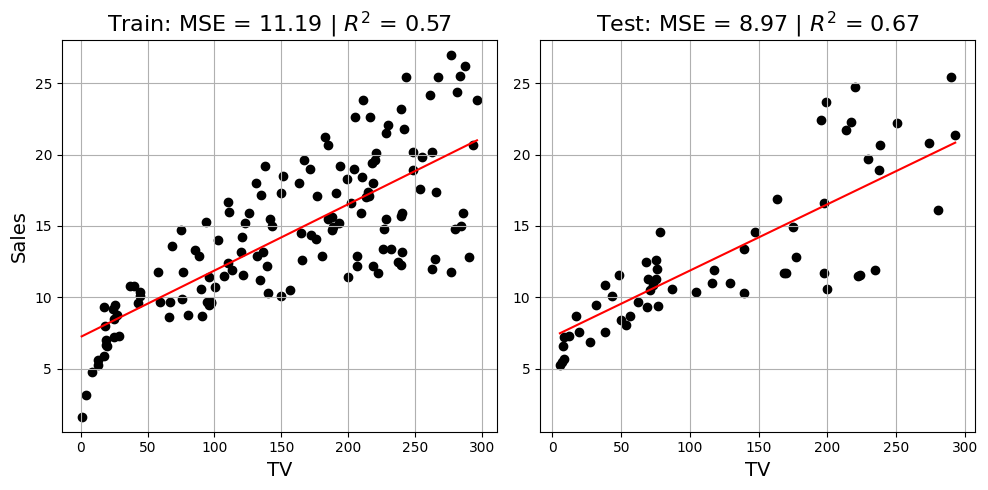

In [ ]:
train_sort_idx, test_sort_idx = np.argsort(X_train[:,0]), np.argsort(X_test[:,0])

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(X_train, Y_train, c = 'k')
ax[0].grid()
ax[0].plot(X_train[train_sort_idx], Y_train_pred[train_sort_idx], c = 'r')
ax[0].set_ylim([Y.min()-1, Y.max()+1])
ax[0].set_title(f"Train: MSE = {mse_train.round(2)} | $R^2$ = {r2_train.round(2)}", fontsize = 16)
ax[0].set_ylabel("Sales", fontsize = 14)
ax[0].set_xlabel("TV", fontsize = 14)

ax[1].scatter(X_test, Y_test, c = 'k')
ax[1].grid()
ax[1].plot(X_test[test_sort_idx], Y_test_pred[test_sort_idx], c = 'r') ;
ax[1].set_ylim([Y.min()-1, Y.max()+1])
ax[1].set_title(f"Test: MSE = {mse_test.round(2)} | $R^2$ = {r2_test.round(2)}", fontsize = 16)
ax[1].set_xlabel("TV", fontsize = 14) ;

fig.tight_layout()

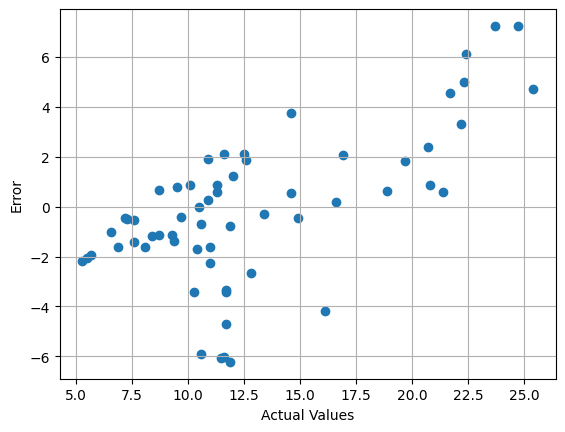

In [ ]:
# Visualize residuals (check for homoscedasticity)
error_test = Y_test - Y_test_pred

sort_idx = np.argsort(Y_test[:, 0])

plt.scatter(Y_test[sort_idx], error_test[sort_idx])
plt.xlabel('Actual Values')
plt.ylabel('Error')
plt.grid()

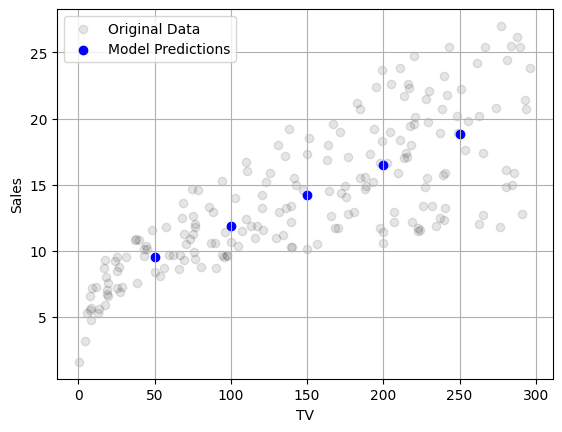

In [ ]:
# Gereate model predictions
X_new = np.array([50, 100, 150, 200, 250]).reshape(-1, 1)
X_new_s = scaler.transform(X_new)
Y_new = model_1.predict(X_new_s)

plt.scatter(X, Y, c = 'k', alpha = 0.1, label = 'Original Data')
plt.scatter(X_new, Y_new, c = 'b', label = 'Model Predictions')
plt.grid()
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend() ;

In [ ]:
# Boston dataset
Y = boston['MEDV']
X = boston.drop(columns = ['MEDV'])

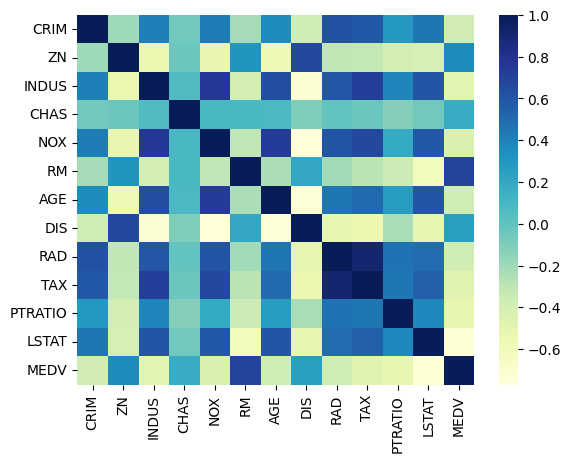

In [ ]:
# Covariance matrix between all features
sns.heatmap(boston.corr(), cmap = 'YlGnBu') ;

In [ ]:
# Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    train_size = 0.7,
                                                    shuffle = True)

if X_train.ndim == 1:
  X_train, X_test = np.expand_dims(X_train, 1), np.expand_dims(X_test, 1)

if Y_train.ndim == 1:
  Y_train, Y_test = np.expand_dims(Y_train, 1), np.expand_dims(Y_test, 1)

In [ ]:
# Multivariate regression model
model_2 = LinearRegression(fit_intercept = True)

scaler_2 = StandardScaler()

scaler_2.fit(X_train)

X_train_s, X_test_s = scaler_2.transform(X_train), scaler_2.transform(X_test)

model_2.fit(X_train_s, Y_train) ;

In [ ]:
print(f"Bias: {model_2.intercept_.item()}")
print(f"Slope: {np.squeeze(model_2.coef_)}")

Bias: 22.15988700564972
Slope: [-1.24639211  1.45571322  0.27576524  0.85839457 -1.72382344  1.65232164
  0.29638847 -3.31427202  2.66493135 -2.31729536 -2.0103762  -4.71110378]


In [ ]:
# Predict on training and test set
Y_train_pred = model_2.predict(X_train_s)
Y_test_pred = model_2.predict(X_test_s)

# Evaluate model performance
mse_train = mean_squared_error(Y_train, Y_train_pred)
mae_train = mean_absolute_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
N_train, K = X_train.shape
adj_r2_train = 1 - (1-r2_train)*(N_train-1) / (N_train-K-1)

mse_test = mean_squared_error(Y_test, Y_test_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)
N_test, _ = X_test.shape
adj_r2_test = 1 - (1-r2_test)*(N_test-1) / (N_test-K-1)

In [ ]:
print(r2_train, r2_test)
print(adj_r2_train, adj_r2_test)

0.732329129329663 0.7103126186100539
0.7229096265494752 0.6853036360440155


In [ ]:
print(f"MSE: Train = {mse_train.round(2)}, Test = {mse_test.round(2)}")
print(f"MAE: Train = {mae_train.round(2)}, Test = {mae_test.round(2)}")
print(f"R^2: Train = {r2_train.round(2)}, Test = {r2_test.round(2)}")
print(f"adj-R^2: Train = {adj_r2_train.round(2)}, Test = {adj_r2_test.round(2)}")

MSE: Train = 20.96, Test = 28.26
MAE: Train = 3.25, Test = 3.8
R^2: Train = 0.73, Test = 0.71
adj-R^2: Train = 0.72, Test = 0.69


In [ ]:
def svd(A, max_components = None, threshold = .90, standardize = False, display = False, figsize = None):

  if standardize:
    A = (A - A.mean(0))/A.std(ddof = 1)

  U, S, V_H = np.linalg.svd(A)

  V = V_H.conj().T

  S_cumpct = S.cumsum()/S.sum()

  i_max = np.where(S_cumpct <= threshold)[0].max() + 1

  num_components = np.arange(1,len(S_cumpct)+1)

  if display:
    plt.figure(figsize = figsize)
    plt.stem(num_components, S_cumpct*100, basefmt = ' ')
    plt.axhline(y = threshold*100, linestyle = '--', color = 'r', label = 'Threshold')
    plt.xticks(num_components)
    plt.yticks(np.arange(0, 101, 10))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumaltive Percent Explained [%]')
    plt.title(f"{np.round(S_cumpct[i_max]*100, 2)}% Explained by first {i_max} Components")
    plt.grid()

  if max_components is None:
    U = U[:, :i_max]
    S = S[:i_max]
    V = V[:, :i_max]
  else:
    U = U[:, :max_components]
    S = S[:max_components]
    V = V[:, :max_components]

  A_proj = A.dot(V)

  return U, S, V, A_proj

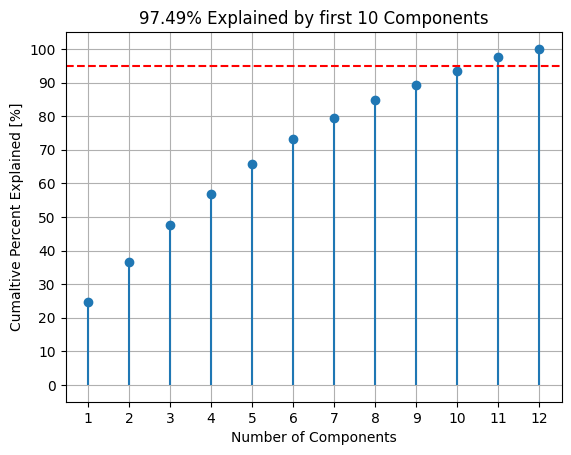

In [ ]:
# Effect of SVD
U_train, S_train, V_train, X_proj_train = svd(X_train_s,
                                              threshold = 0.95,
                                              display = True)

X_proj_test = X_test_s.dot(V_train)

In [ ]:
# Multivariate regression model
model_3 = LinearRegression(fit_intercept = True)

model_3.fit(X_proj_train, Y_train) ;

In [ ]:
print(f"Bias: {model_3.intercept_.item()}")
print(f"Slope: {np.squeeze(model_3.coef_)}")

Bias: 22.47655367231639
Slope: [-2.50371427  3.15326469 -3.07449992 -1.46975213  1.35027745 -0.14748451
 -0.62425383 -0.02876457  1.53241646  0.9101815 ]


In [ ]:
# Predict on training and test set
Y_train_pred = model_3.predict(X_proj_train)
Y_test_pred = model_3.predict(X_proj_test)

# Evaluate model performance
mse_train = mean_squared_error(Y_train, Y_train_pred)
mae_train = mean_absolute_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
N_train, K = X_proj_train.shape
adj_r2_train = 1 - (1-r2_train)*(N_train-1) / (N_train-K-1)

mse_test = mean_squared_error(Y_test, Y_test_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)
N_test, _ = X_proj_test.shape
adj_r2_test = 1 - (1-r2_test)*(N_test-1) / (N_test-K-1)

In [ ]:
print(r2_train, r2_test)
print(adj_r2_train, adj_r2_test)

0.7396838367401914 0.5685856151317616
0.7320944442253282 0.5379888502474894


In [ ]:
print(f"MSE: Train = {mse_train.round(2)}, Test = {mse_test.round(2)}")
print(f"MAE: Train = {mae_train.round(2)}, Test = {mae_test.round(2)}")
print(f"R^2: Train = {r2_train.round(2)}, Test = {r2_test.round(2)}")
print(f"adj-R^2: Train = {adj_r2_train.round(2)}, Test = {adj_r2_test.round(2)}")

MSE: Train = 23.42, Test = 30.84
MAE: Train = 3.37, Test = 3.5
R^2: Train = 0.74, Test = 0.57
adj-R^2: Train = 0.73, Test = 0.54


Statsmodels

In [ ]:
X_train_s_1 = add_constant(X_train_s)

In [ ]:
model_3 = OLS(endog = Y_train, exog = X_train_s_1, hasconst = True)
results_3 = model_3.fit() ;

In [ ]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     107.1
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          9.08e-108
Time:                        03:53:09   Log-Likelihood:                -1006.8
No. Observations:                 354   AIC:                             2040.
Df Residuals:                     341   BIC:                             2090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4011      0.225     99.466      0.000      21.958      22.844
x1            -1.1754      0.286     -4.117      0.000      -1.737      -0.614
x2             1.0039      0.343      2.925      0.004       0.329       1.679
x3            -0.0785      0.464     -0.169      0.866      -0.990       0.833
x4             0.4410      0.237      1.863      0.063      -0.025       0.907
x5            -1.6705      0.479     -3.490      0.001      -2.612      -0.729
x6             2.8136      0.314      8.955      0.000       2.196       3.432
x7             0.1128      0.412      0.274      0.785      -0.698       0.924
x8            -2.7726      0.449     -6.181      0.000      -3.655      -1.890
x9             2.1805      0.601      3.631      0.000       0.999       3.362
x10           -2.4154      0.655     -3.686      0.000      -3.704      -1.127
x11           -2.0521      0.310     -6.615      0.000      -2.662      -1.442
x12           -3.5719      0.386     -9.247      0.000      -4.332      -2.812
==============================================================================
Omnibus:                       71.889   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.974
Skew:                           1.023   Prob(JB):                     1.11e-35
Kurtosis:                       5.594   Cond. No.                         9.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = False)

poly.fit(X_train)
X_train_p, X_test_p = poly.transform(X_train), poly.transform(X_test)

In [ ]:
model_4 = LinearRegression()

ffs = SequentialFeatureSelector(model_4,
                                k_features = X_train_p.shape[1],
                                forward = True,
                                floating = False,
                                scoring = "r2",
                                verbose = 2,
                                cv = 5) ;

In [ ]:
ffs_results = ffs.fit(X_train_p, Y_train) ;

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s

[2023-11-02 03:49:34] Features: 1/90 -- score: 0.5337252586223454[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s

[2023-11-02 03:49:35] Features: 2/90 -- score: 0.6687888635945625[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s

[2023-11-02 03:49:36] Features: 3/90 -- score: 0.730693214658244[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

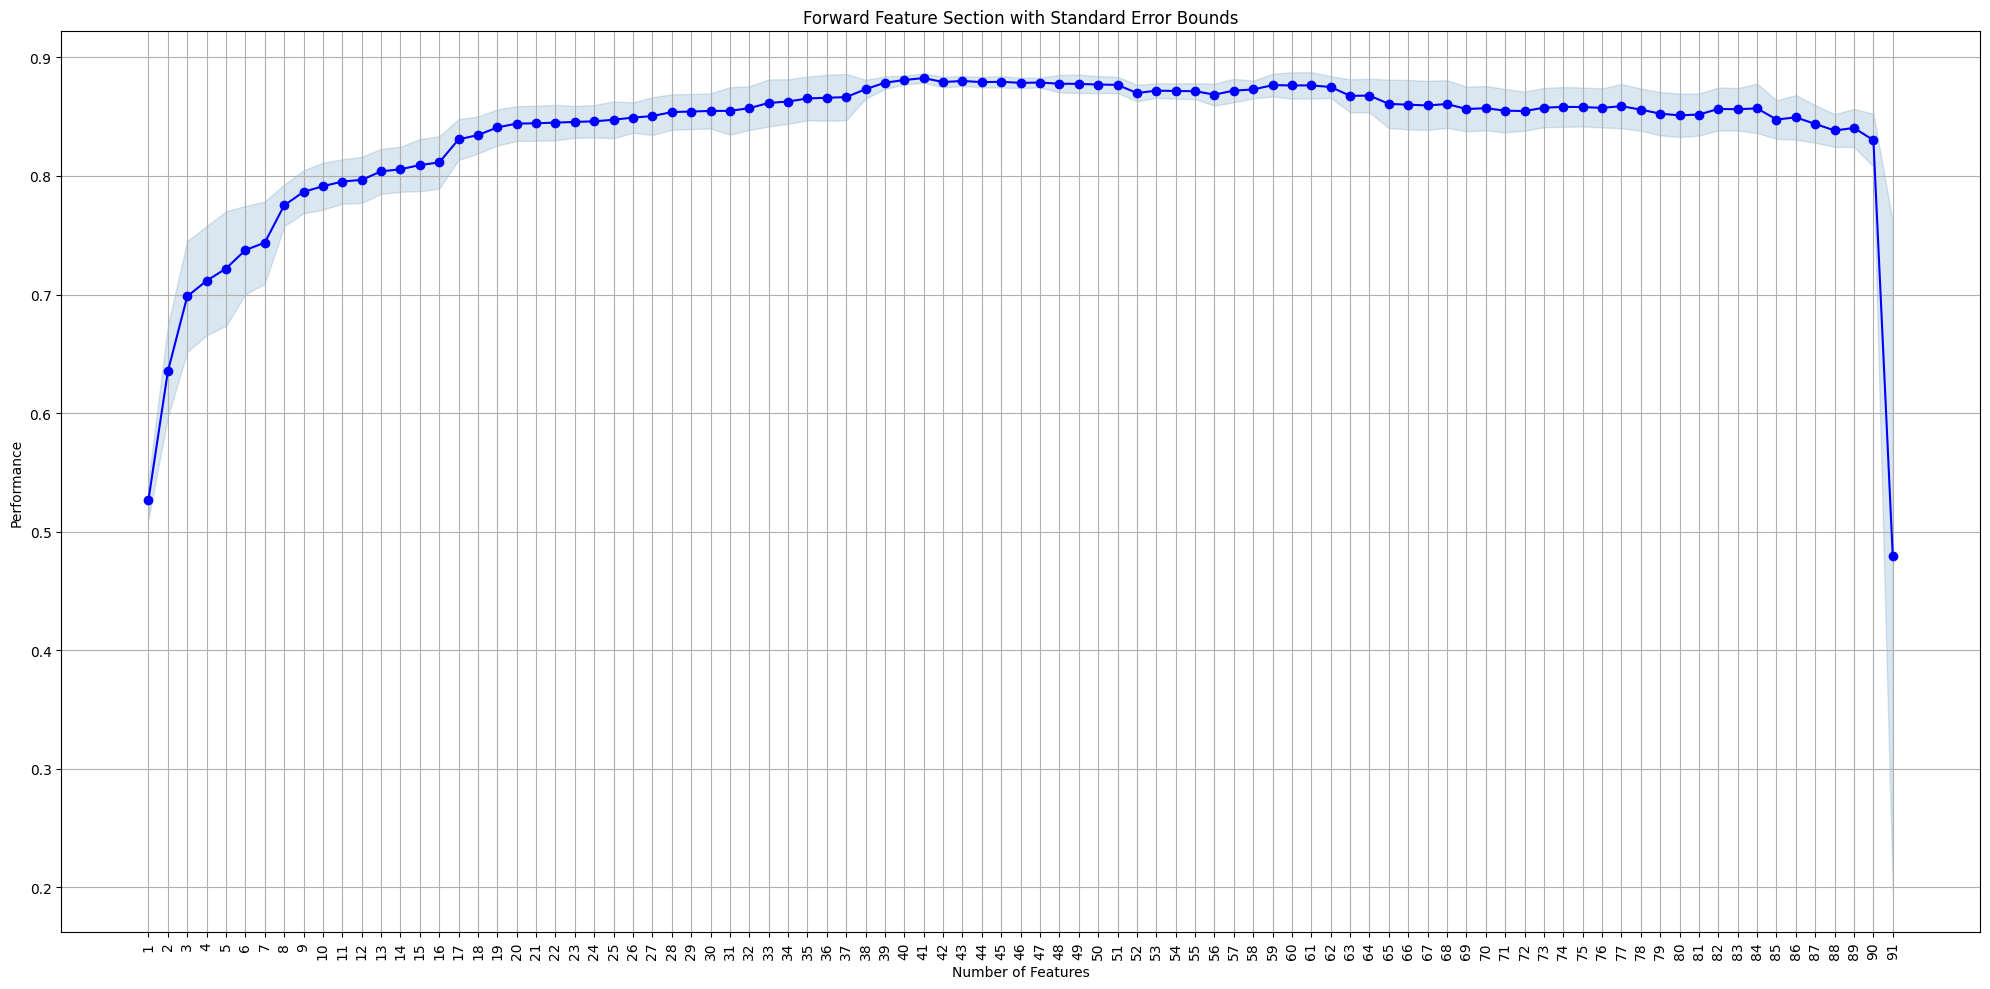

In [ ]:
metrics = ffs_results.get_metric_dict()

fig = plt_sfs(metrics, kind = "std_err", figsize = (20, 10))
plt.grid()
plt.xticks(rotation = 90)
plt.title('Forward Feature Section with Standard Error Bounds') ;

fig[0].tight_layout()

In [ ]:
scaler_4 = StandardScaler()
scaler_4.fit(X_train_p)

X_train_ps, X_test_ps = scaler_4.transform(X_train_p), scaler_4.transform(X_test_p)

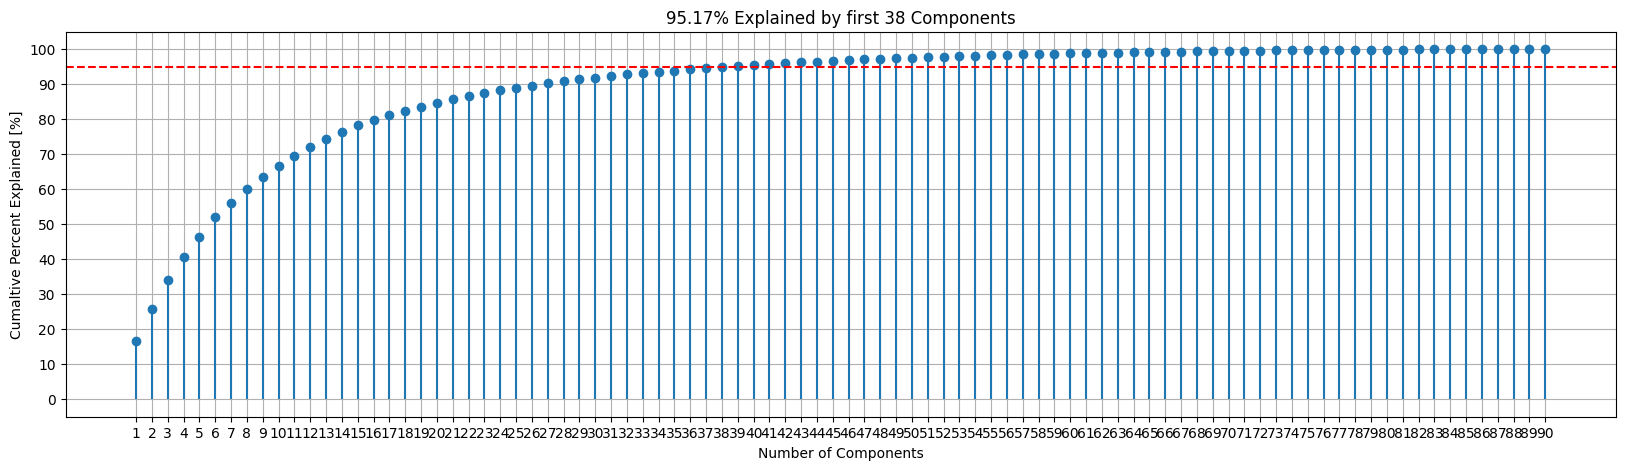

In [ ]:
# Effect of SVD
U_train, S_train, V_train, X_proj_train = svd(X_train_ps,
                                              threshold = 0.95,
                                              display = True, figsize = (20, 5))

X_proj_test = X_test_ps.dot(V_train)

In [ ]:
# pca_skl = PCA(n_components = 39)
# pca_skl.fit(X_train_ps) ;
# X_proj_train_ = pca_skl.transform(X_train_ps)

In [ ]:
# Multivariate regression model
model_4 = LinearRegression(fit_intercept = True)

model_4.fit(X_proj_train, Y_train) ;

In [ ]:
print(f"Bias: {model_4.intercept_.item()}")
print(f"Slope: {np.squeeze(model_4.coef_)}")

Bias: 22.401129943502827
Slope: [-0.89842177  0.58557553  0.57997804  0.6829414  -1.70338859  1.11180834
  0.58617873 -0.05737181  0.01364584  0.81278132  0.31766595 -0.4350743
  1.0051639   0.72530569 -0.55754471  2.46530186  0.09933146  0.60933611
  0.77373135 -0.19089969  0.77438096  1.71418076 -1.09964851 -2.83367178
 -0.37066058  5.60200682  5.57287532 -3.15675805 -1.05474735  6.96206564
  3.62792097 -0.05316976 -0.03405633  2.13810312  0.14383801  0.25806394
 -1.70258234 -3.19007593]


In [ ]:
# Predict on training and test set
Y_train_pred = model_4.predict(X_proj_train)
Y_test_pred = model_4.predict(X_proj_test)

# Evaluate model performance
mse_train = mean_squared_error(Y_train, Y_train_pred)
mae_train = mean_absolute_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
N_train, K = X_proj_train.shape
adj_r2_train = 1 - (1-r2_train)*(N_train-1) / (N_train-K-1)

mse_test = mean_squared_error(Y_test, Y_test_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)
N_test, _ = X_proj_test.shape
adj_r2_test = 1 - (1-r2_test)*(N_test-1) / (N_test-K-1)

In [ ]:
print(r2_train, r2_test)
print(adj_r2_train, adj_r2_test)

0.9035173453807955 0.7472024286704
0.8918781679981613 0.6621908560108885


In [ ]:
print(f"MSE: Train = {mse_train.round(2)}, Test = {mse_test.round(2)}")
print(f"MAE: Train = {mae_train.round(2)}, Test = {mae_test.round(2)}")
print(f"R^2: Train = {r2_train.round(2)}, Test = {r2_test.round(2)}")
print(f"adj-R^2: Train = {adj_r2_train.round(2)}, Test = {adj_r2_test.round(2)}")

MSE: Train = 7.96, Test = 22.46
MAE: Train = 2.09, Test = 3.06
R^2: Train = 0.9, Test = 0.75
adj-R^2: Train = 0.89, Test = 0.66


Image Reconstruction

In [ ]:

# assign and open image
url = 'https://img.freepik.com/premium-photo/cute-beagle-sticker-detailed-2d-game-art-with-highcontrast-shading_899449-33819.jpg'

response = requests.get(url, stream=True)

with open('image.png', 'wb') as f:
	f.write(response.content)

img = cv2.imread('image.png')

# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)

# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(626, 626),s.shape:(626,),v.shape:(626, 626)


In [ ]:
# Effect of SVD
U_train, S_train, V_train, X_proj_train = svd(gray_image,
                                              threshold = 1.,
                                              display = False, figsize = (20, 5))

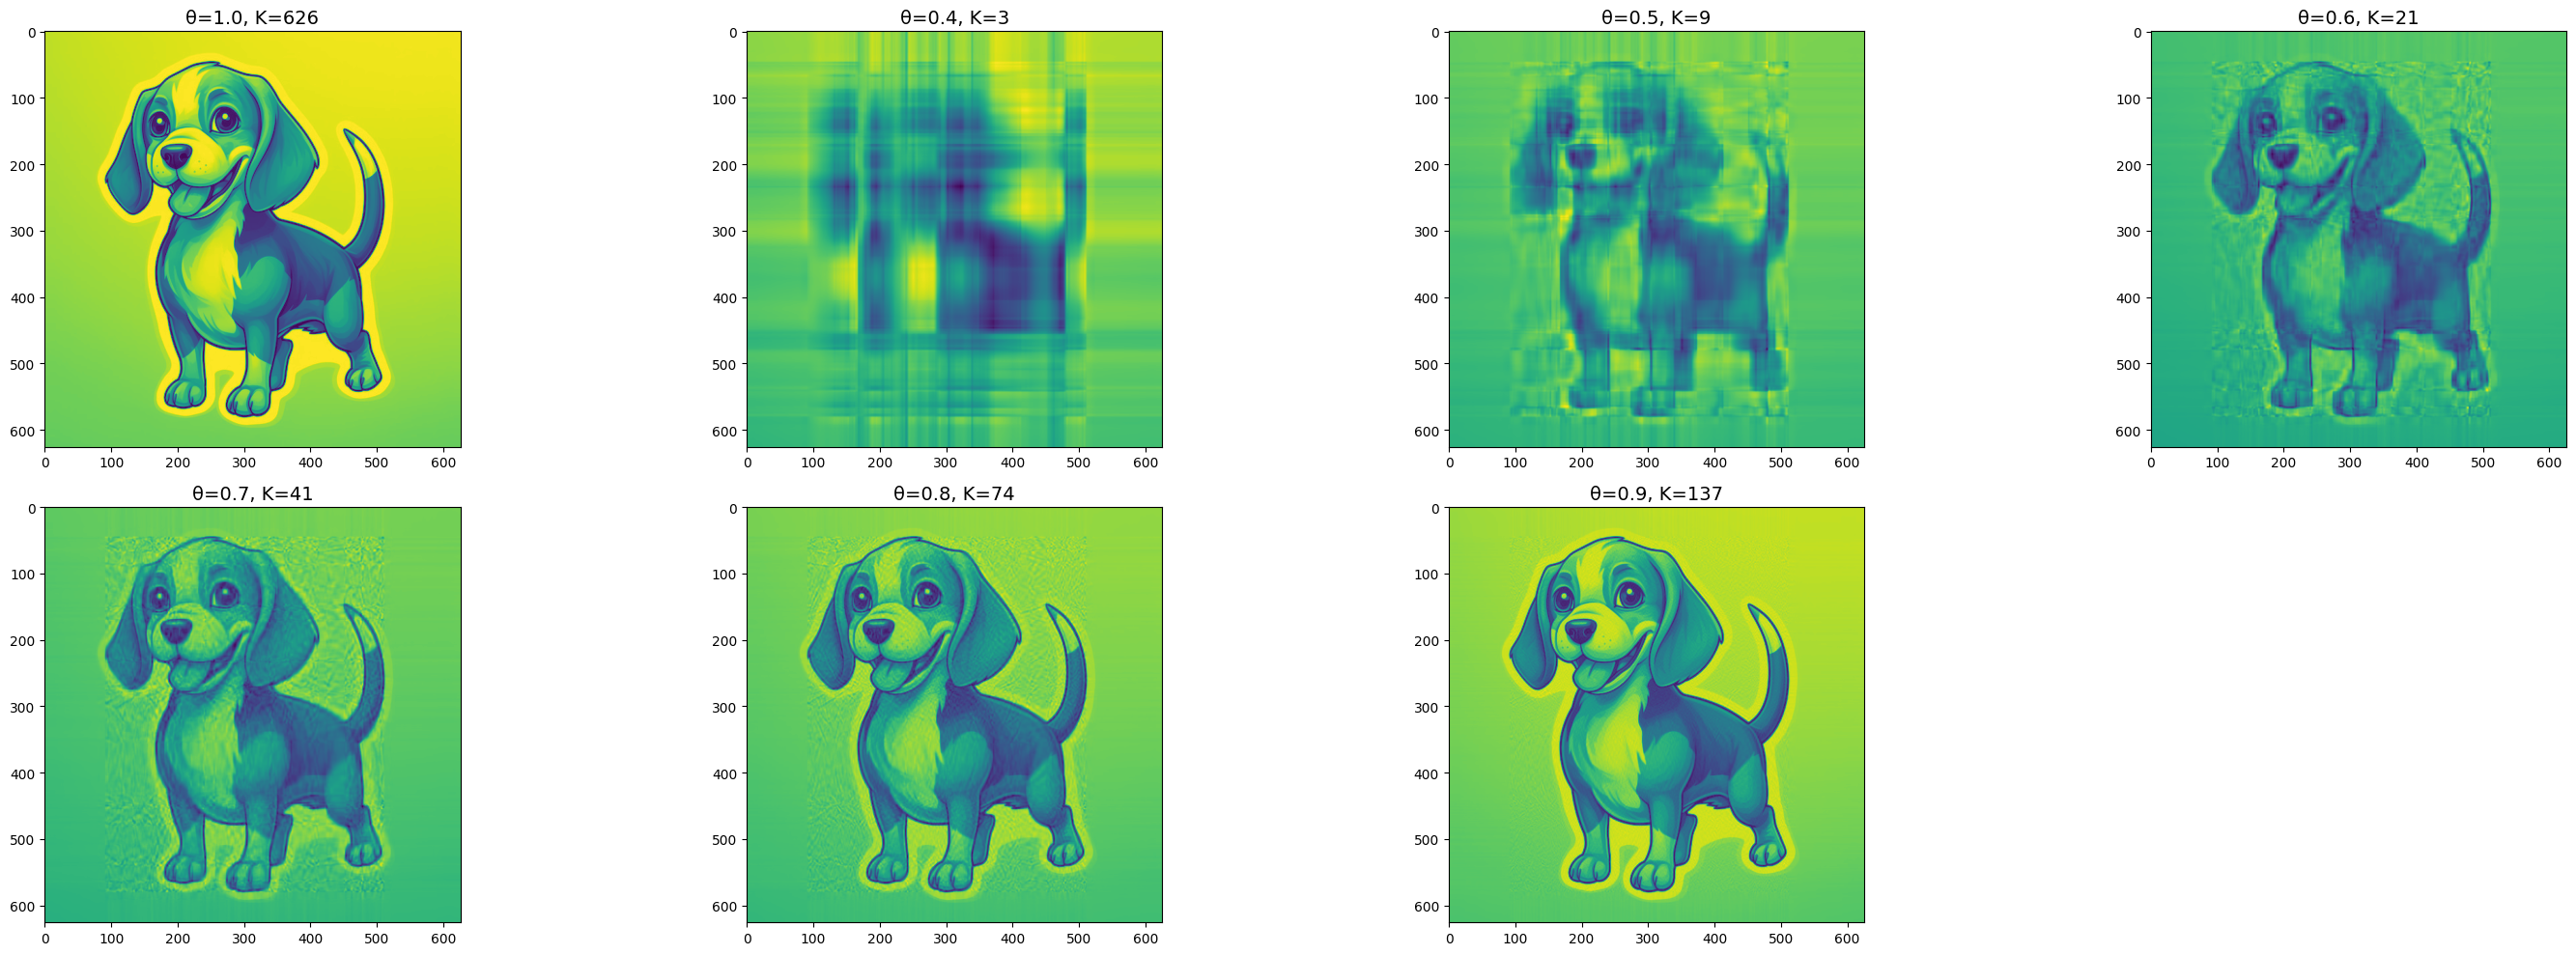

In [ ]:
thresholds = [1., 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

S_cumpct = S_train.cumsum()/S_train.sum()

fig = plt.figure(figsize = (30, 10))

for i, thresh in enumerate(thresholds):

  i_max = np.where(S_cumpct <= thresh)[0].max() + 1
  gray_image_reconstructed = U_train[:, :i_max] @ np.diag(S_train[:i_max]) @ V_train[:, :i_max].conj().T

  plt.subplot(2, 4, i+1)
  plt.imshow(gray_image_reconstructed)

  plt.title(f"θ={thresh}, K={i_max}", fontsize = 14)

fig.tight_layout()